In [29]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import os
import pickle
from collections import defaultdict
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib as mpl

from bgspy.theory import bgs_segment

In [31]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200

In [32]:
d = pd.read_pickle('../data/slim_sims/region/region_results.pkl')
d.head()

,generation,k_mean,k_sd,k3,k4,f_mean,f_sd,f3,f4,s,...,B,ratchet,sh,N,rbp,mu,U,r2sum,ldsum,ldn
0,9991,183.255,9.95354,205.47300,29319.100000,0.981840,0.000977,-1.917230e-10,2.721840e-12,165,...,0.809891,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000100,1000,1.000000e-08,3.160000e-08,0.03160,15828.696281,9.949578,1087
1,9991,2.052,1.37448,1.46144,11.371400,0.979679,0.013484,-1.286580e-06,1.025130e-07,0,...,0.447629,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.010000,1000,1.000000e-08,1.000000e-08,0.01000,76.917284,-0.069883,163
2,9991,15.666,3.57732,16.33530,442.778000,0.995061,0.001125,-5.042940e-10,4.324960e-12,8,...,0.967104,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.000316,1000,1.000000e-08,3.160000e-09,0.00316,101.387791,1.575995,110
3,9991,2.539,1.35880,1.60589,11.249100,0.997464,0.001356,-1.585270e-09,1.112040e-11,0,...,0.907269,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.001000,1000,1.000000e-08,1.000000e-09,0.00100,8.569703,-0.017530,26
4,9991,0.477,0.66777,0.38500,0.850506,0.995239,0.006652,-3.759330e-07,8.228740e-09,0,...,0.912131,"[[1, 0], [11, 0], [21, 0], [31, 0], [41, 0], [...",0.010000,1000,1.000000e-08,3.160000e-09,0.00316,4.354501,-0.018841,53


In [33]:
dg = d.groupby(['sh', 'rbp', 'N', 'mu', 'U']).mean().reset_index()

[]

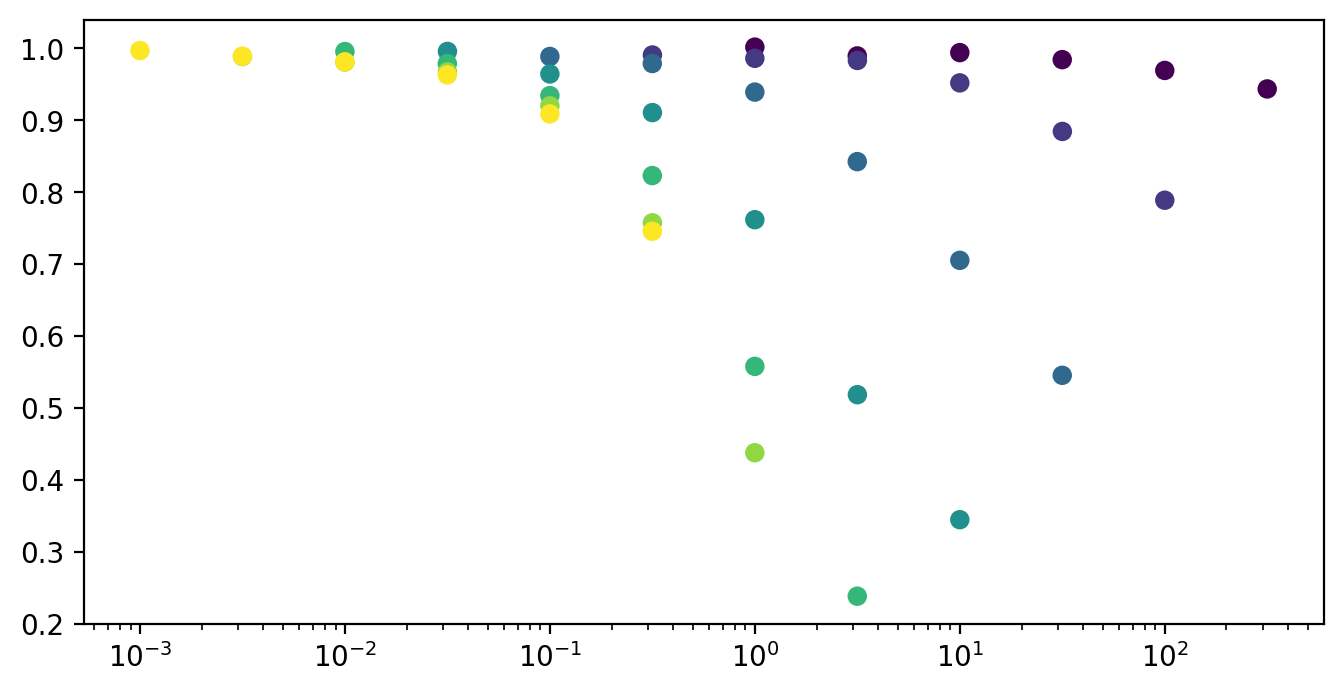

In [34]:
plt.scatter(dg['U']/dg['sh'], dg['B'], c=np.log10(dg['sh']))
plt.semilogx()

Text(0.5, 0, 'R')

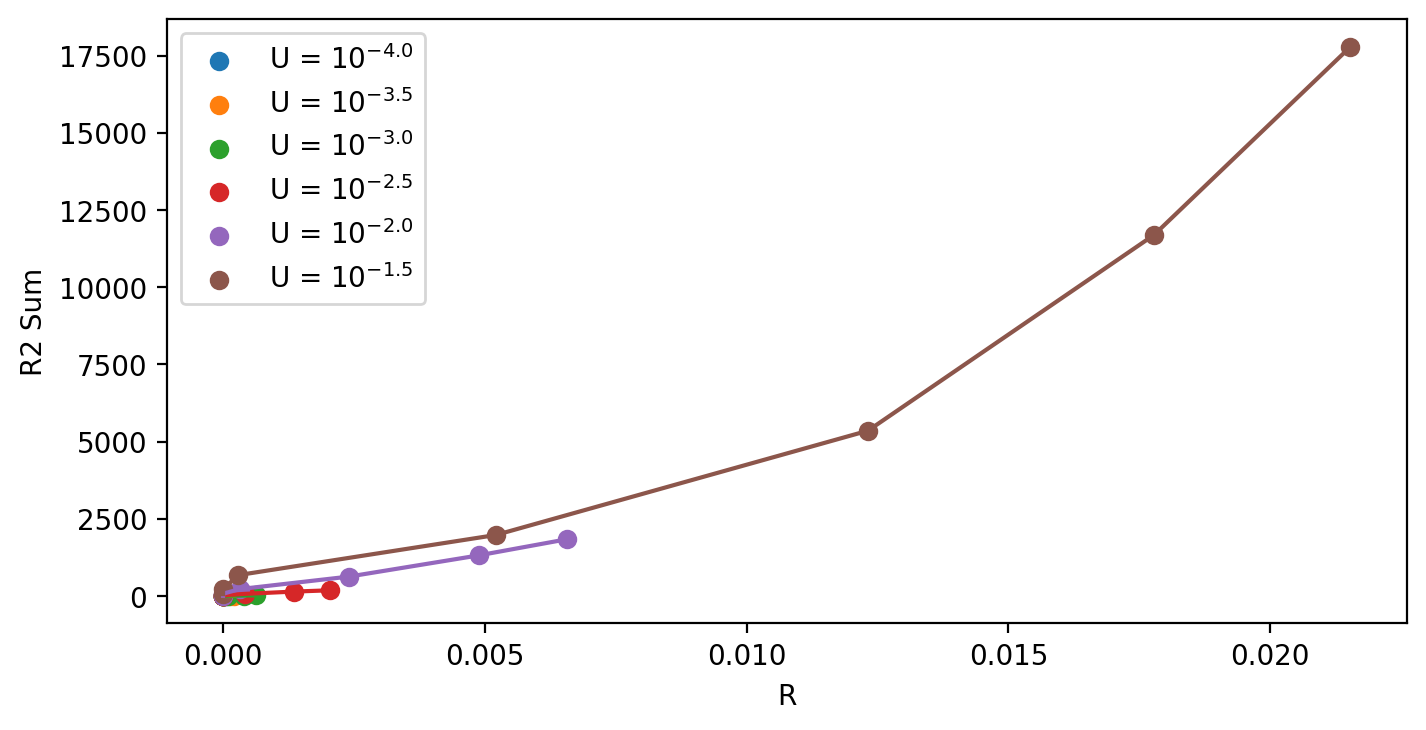

In [63]:
for u in dg['U'].unique():
    dgs = dg.loc[dg['U'] == u]
    plt.plot(dgs['R'], dgs['r2sum'])
    plt.scatter(dgs['R'], dgs['r2sum'], label=f"U = $10^{{{np.round(np.log10(u), 2)}}}$")
plt.legend()
#plt.semilogx()
plt.ylabel('R2 Sum')
plt.xlabel('R')

In [72]:
@np.vectorize
def ok71(rho):
    return (10 + rho) / (22 + 13*rho + rho**2)

@np.vectorize
def neutral_ld(L, rbp, N, s=None, u=None):
    # N is *diploid* pop size
    R = rbp * L
    fun = lambda x: ok71(4*N*rbp*x) * (2-2*x) * R
    return integrate.quad(fun, 0, 1)[0]

Text(0.5, 0, 'R')

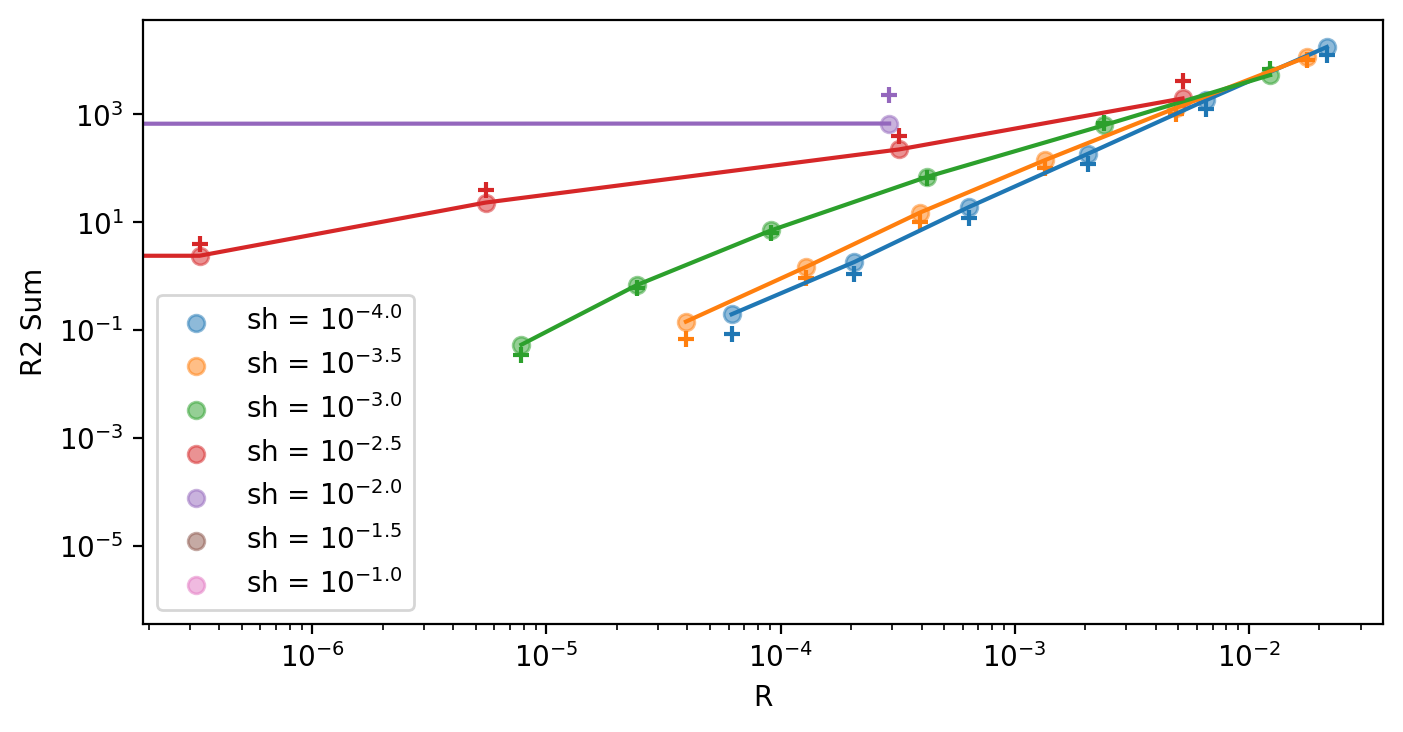

In [101]:
L = 1000000

for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    lines = plt.plot(dgs['R'], dgs['r2sum'])
    plt.scatter(dgs['R'], dgs['r2sum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$", alpha=0.5)
    n = dgs['ldn']
    # NOTE: factor of two!
    plt.scatter(dgs['R'], neutral_ld(L, 1e-8, 1000) * 2 * n * (n-1), c=lines[0].get_color(), marker='+')
plt.legend()
plt.loglog()
plt.ylabel('R2 Sum')
plt.xlabel('R')

Text(0.5, 0, 'R')

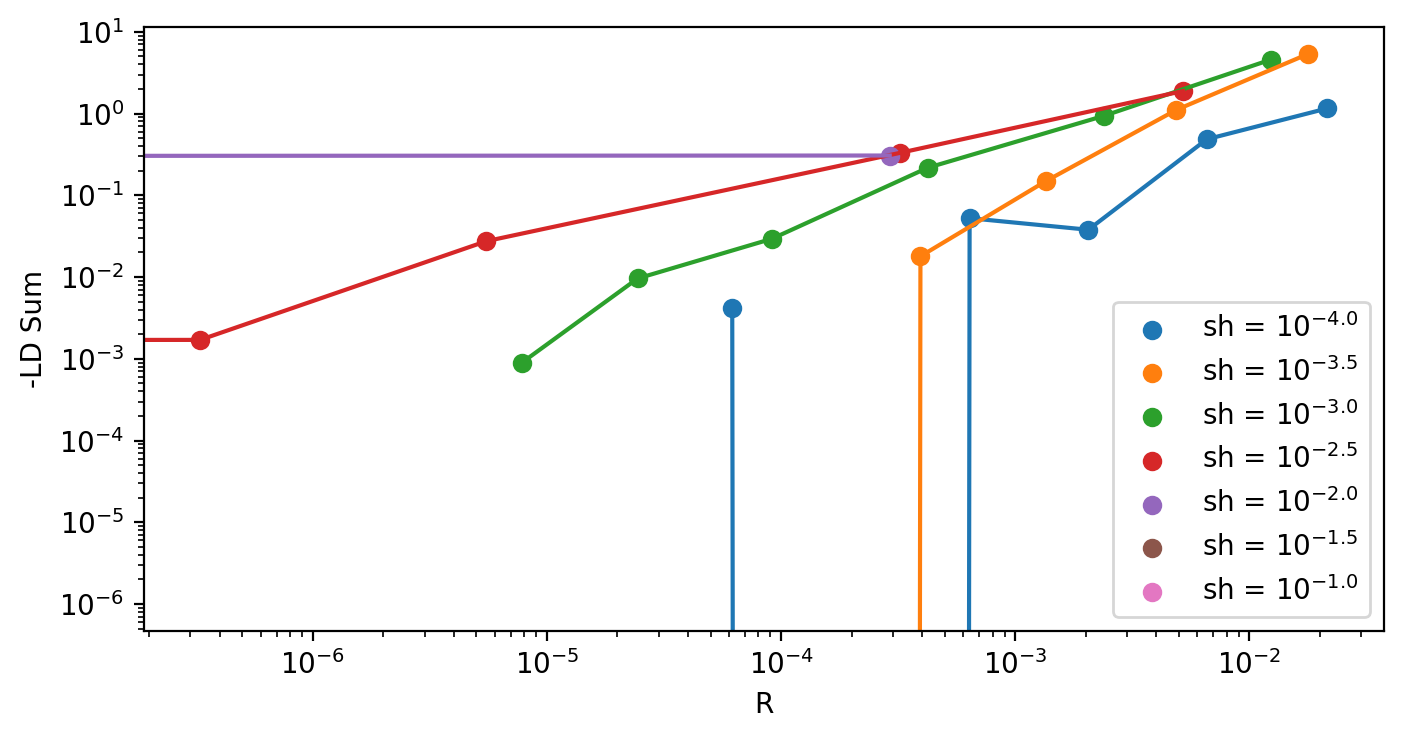

In [98]:
L = 1000000

for s in dg['sh'].unique():
    dgs = dg.loc[dg['sh'] == s]
    lines = plt.plot(dgs['R'], -dgs['ldsum'])
    plt.scatter(dgs['R'], -dgs['ldsum'], label=f"sh = $10^{{{np.round(np.log10(s), 2)}}}$")
    n = dgs['ldn']
    #plt.scatter(dgs['R'], neutral_ld(L, 1e-8, 1000) * 2 * n * (n-1), c=lines[0].get_color(), alpha=0.1)
plt.legend()
plt.loglog()
plt.ylabel('-LD Sum')
plt.xlabel('R')

In [75]:
dg['ldn']

0        3.590
1       11.568
2       37.169
3      116.589
4      370.249
5     1167.009
6        3.284
7       10.546
8       33.618
9      106.142
10     335.438
11    1051.196
12       2.513
13       8.654
14      27.057
15      86.443
16     273.505
17     875.439
18       1.860
19       6.756
20      21.112
21      66.279
22     208.696
23     673.853
24       1.353
25       5.070
26      16.253
27      51.654
28     161.651
29     497.646
30       0.871
31       3.751
32      12.046
33      37.911
34     119.311
35     368.648
36       0.444
37       2.433
38       8.023
39      25.386
40      80.151
41     250.848
Name: ldn, dtype: float64